In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./ 255
)

2023-06-13 07:35:50.126512: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 07:35:50.297972: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 07:35:50.299376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 07:35:51.110960: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
target_size = (190, 200)
batch_size = 32

In [3]:
generator = datagen.flow_from_directory("/home/ekkology/Descargas/Dataset/data/train",
                                       target_size = target_size,
                                        batch_size = batch_size
                                       )

Found 33984 images belonging to 4 classes.


In [4]:
x_batch, y_batch = generator.next()

x_batch.shape, y_batch.shape

((32, 190, 200, 3), (32, 4))

In [5]:
sample = x_batch[0]

In [6]:
import matplotlib.pyplot as plt

/home/ekkology/.local/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 1. 0. 0.]')

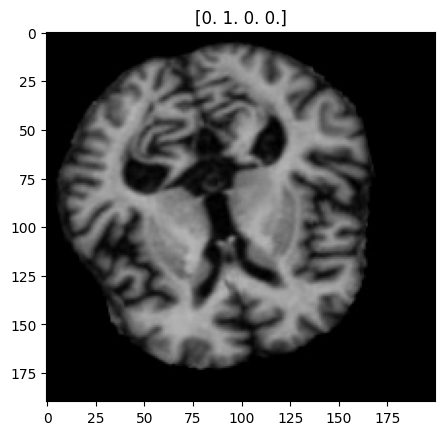

In [7]:
plt.imshow(sample)
plt.title(y_batch[0])

In [8]:
generator.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [10]:
img_width, img_height = 190, 200

In [11]:
epochs = 10
batch_size = 32
num_sample = generator.samples
steps_per_epoch = num_sample // batch_size
input_shape = (img_width, img_height, 3)

In [12]:
steps_per_epoch

1062

In [13]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

2023-06-13 07:36:53.503972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-13 07:36:53.611625: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [16]:
history = model.fit(
    generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 1
)

2023-06-13 07:54:18.561177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 615/1062 [================>.............] - ETA: 2:43 - loss: 0.6036 - accuracy: 0.7264

KeyboardInterrupt: 

In [ ]:
Test_generator = datagen.flow_from_directory("/kaggle/input/augmented-alzheimer-mri-dataset-v2/data/val",
                                       target_size = target_size,
                                        batch_size = batch_size
                                       )

In [ ]:
model.evaluate_generator(Test_generator)

In [ ]:
model.save("model1.h5")

# TRYING A DIFFERENT MODEL, THE ALEX NET MODEL

Since the Image Net dataset which the Alex Net Model was pretrained on doesn't have any Alzheimer related images, For this new model its best not to fine-tune but just pretrain it on a the Alzheimer dataset.

In [ ]:
from tensorflow import keras

In [ ]:
base_model = keras.applications.Xception(
    weights=None,  
    input_shape=(190, 200, 3),
    include_top=False)

In [ ]:
base_model.trainable = True # all the layers are to be trained from scratch

In [ ]:
inputs = keras.Input(shape=(190, 200, 3))
x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(4, activation = "softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model.fit(generator, epochs=20)

In [ ]:
model.evaluate(Test_generator)

# Clearly its overffiting, pottential solutions
* **Add Callbacks to avoid overffiting**
* **Hyper parameter tuning**
* **Perform a Voting Classifier using the two models**

In [ ]:
model.save("model2.h5")